### This is the script used to create and train the model

I used the [Udacity simulator](https://github.com/udacity/self-driving-car-sim.git) to record data of me driving the car around the track


In [1]:
import csv
import cv2
import numpy as np
import tensorflow
import keras
import matplotlib.pyplot as plt

keras.__version__


Using TensorFlow backend.


'2.0.8'

11482


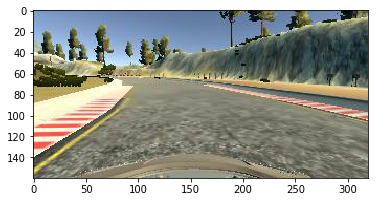

In [26]:
## This cell sets up the training data

#next 6 lines of code extract the lines from the .csv file (cells from
# left to right represent: center image, left, and right image paths, 
# steering angle, throttle, brake then speed) to 'lines' list

lines = []
csv_path = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P4-Behavioral-Cloning\data\driving_log.csv'
with open(csv_path) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# the next lines of code in this cell append center camera images to 
# 'images' list and corresponding steering angles to 'measurements'
images_path = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P4-Behavioral-Cloning\data\IMG'
images = []
measurements = []
for line in lines[:8713]:
    source_path = line[0]
    filename = r'/' + source_path.split('/')[-1]
    current_path = images_path + filename
#     print(current_path)
    image = cv2.imread(current_path) #read image in BGR
#     print(image.shape)
    #     print(current_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

for line in lines[8713:]:
#     source_path = line[0]
#     filename = r'/' + source_path.split('/')[-1]
#     current_path = images_path + filename
#     print(current_path)
    image = cv2.imread(line[0]) #read image in BGR
#     print(image.shape)
    #     print(current_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)    

X_train = np.array(images) #convert to numpy array as required by Keras
y_train = np.array(measurements) #convert to numpy array as required by Keras

plt.imshow(images[-1])
print(len(images))

In [31]:
## In this cell, I create my model architecture then train my model

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

print(y_train.shape)
keras.utils.to_categorical(y_train)
print(y_train.shape)

dropout = 0.3

# The model architecture below is very similar to NVIDIA's End-to-end architecture. I customized it based on the class
# recommendations and nature of the data to make it yield good results. See project writeup for more details.
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3), output_shape=(160,320,3)))
model.add(Convolution2D(24, (5, 5), activation="relu", strides=(2, 2)))
model.add(Convolution2D(36, (5, 5), activation="relu", strides=(2, 2)))
model.add(Dropout(dropout))
model.add(Convolution2D(48, (5, 5), activation="relu", strides=(2, 2)))
model.add(Convolution2D(64, (3, 3), activation="relu", data_format="channels_first"))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(50, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch = 5)

model.save('model.h5')

(11482,)
(11482,)
Train on 9185 samples, validate on 2297 samples
Epoch 1/5
9185/9185 [==============================] - 17s - loss: 0.0387 - val_loss: 0.1327
Epoch 2/5
9185/9185 [==============================] - 16s - loss: 0.0335 - val_loss: 0.0772
Epoch 3/5
9185/9185 [==============================] - 16s - loss: 0.0247 - val_loss: 0.0810
Epoch 4/5
9185/9185 [==============================] - 16s - loss: 0.0216 - val_loss: 0.0559
Epoch 5/5
9185/9185 [==============================] - 16s - loss: 0.0216 - val_loss: 0.0714
